In [1]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

2024-10-25 12:22:54.274534: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-25 12:22:54.433944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-25 12:22:54.497149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-25 12:22:54.514336: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-25 12:22:54.626036: I tensorflow/core/platform/cpu_feature_guar

In [2]:
vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", vae=vae, torch_dtype=torch.float16, variant="fp16", use_safetensors=True)
pipe.load_lora_weights("sshh12/sdxl-lora-planet-textures")
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
prompt = input("")
negative_prompt = 'blurry, fuzzy, low resolution, cartoon, painting'


In [4]:
print(prompt)

a volcanic planet with lava covering the surface on a hellish landscape with bright trails of magma


  0%|          | 0/50 [00:00<?, ?it/s]

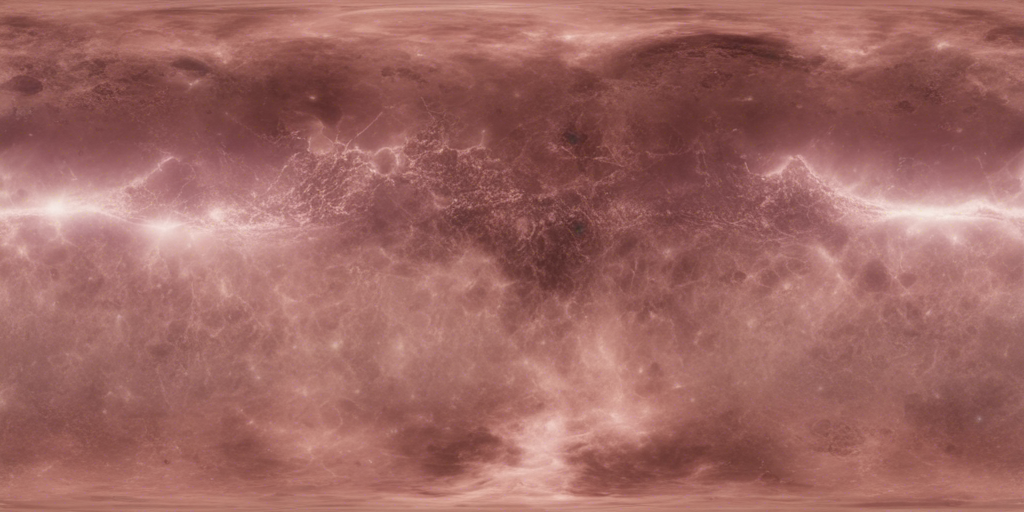

In [5]:
image = pipe(prompt=prompt, negative_prompt=negative_prompt, width=1024, height=512).images[0]
image